In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\tejas\Downloads\SDA_assignment (1) (2) (3) (1).csv")

In [44]:
data

,Channel_group,course,lead_id,Lead_type,lead_date,graduation_year,amount_paid,paid_at
0,A,Java,"1,42,649",ABC,2024-05-17 17:53:00,2008,NaN,NaN
1,A,Java,"41,63,228",XYZ,2024-05-25 15:23:00,2009,NaN,NaN
2,B,Java,"41,76,457",EFG,2024-05-06 10:12:00,2000,NaN,NaN
3,A,Java,"1,36,989",ABC,2024-05-16 12:31:00,2009,NaN,NaN
4,C,Java,"1,40,085",ABC,2024-05-01 20:35:00,2002,NaN,NaN
...,...,...,...,...,...,...,...,...
16455,A,Python,"41,79,788",EFG,2024-05-03 05:27:00,2023,NaN,NaN
16456,B,SEO,"41,73,873",XYZ,2024-05-04 18:40:00,2009,NaN,NaN
16457,A,SEO,"41,82,565",XYZ,2024-05-28 00:59:00,2008,NaN,NaN
16458,E,SEO,"41,77,786",XYZ,2024-05-04 07:55:00,2022,NaN,NaN


In [5]:
#counting is there any null value
data.count()

Channel_group      16460
course             16460
lead_id            16460
Lead_type          16460
lead_date          16460
graduation_year    16460
amount_paid          648
paid_at              648
dtype: int64

# Data Cleaning 

In [50]:
# Calculate missing values
missing_values = data.isnull().sum()

# Print missing values with a heading
print("Below are the Missing Values as Per Analysis:\n")
for column, count in missing_values.items():
    print(f"- {column}: {count} missing values")

Below are the Missing Values as Per Analysis:

- Channel_group: 0 missing values
- course: 0 missing values
- lead_id: 0 missing values
- Lead_type: 0 missing values
- lead_date: 0 missing values
- graduation_year: 0 missing values
- amount_paid: 15812 missing values
- paid_at: 15812 missing values


In [10]:
#Analyzing Acquisition Channels
channel_group_data = data['Channel_group'].value_counts().head(5)
print(channel_group_data)

Channel_group
A    7932
M    1647
F    1586
D    1294
E    1080
Name: count, dtype: int64


In [14]:
#Analyzing Courses
course_data = data['course'].value_counts().head(5)
print(course_data)

course
Python              4323
Java                4250
CRM                 2565
Guitar              2164
Google Analytics    1358
Name: count, dtype: int64


In [16]:
#Conversion Rates by Channels
paid_data = data[data['amount_paid'].notnull()]
conversion_rate = (
    paid_data.groupby('Channel_group').size() / data.groupby('Channel_group').size() * 100
).dropna().sort_values(ascending=False)
print(paid_data)

      Channel_group            course    lead_id Lead_type         lead_date  \
10                B              Java  41,98,658       EFG  10-05-2024 02:55   
24                A              Java  41,80,565       EFG  25-05-2024 20:55   
27                A              Java  41,74,439       EFG  07-05-2024 12:09   
30                C              Java  41,77,297       EFG  05-05-2024 00:26   
36                A              Java   1,42,057       ABC  16-05-2024 03:08   
...             ...               ...        ...       ...               ...   
16245             C            Python  42,06,741       EFG  31-05-2024 12:05   
16366             B  Google Analytics  41,85,679       EFG  27-05-2024 03:47   
16403             B               SEO  40,93,012       EFG  24-05-2024 23:06   
16417             B  Google Analytics  41,56,596       EFG  14-05-2024 14:02   
16431             A  Google Analytics  41,38,455       EFG  05-05-2024 11:47   

       graduation_year  amount_paid    

In [20]:
#lead Trends Over Time
data['lead_date'] = pd.to_datetime(data['lead_date'])
leads_over_time = data.groupby('lead_date').size()

In [19]:
data['lead_date'] = pd.to_datetime(data['lead_date'], dayfirst=True)


In [22]:
# Summary of Payment Data
payment_summary = {
    'Average Payment': paid_data['amount_paid'].mean(),
    'Minimum Payment': paid_data['amount_paid'].min(),
    'Maximum Payment': paid_data['amount_paid'].max()
}
print(payment_summary)

{'Average Payment': 41670.317901234564, 'Minimum Payment': 31611.0, 'Maximum Payment': 48402.0}


In [25]:
#Visualization Settings
sns.set(style="whitegrid", palette="muted")

# Visualization 1: Top 5 Acquisition Channels

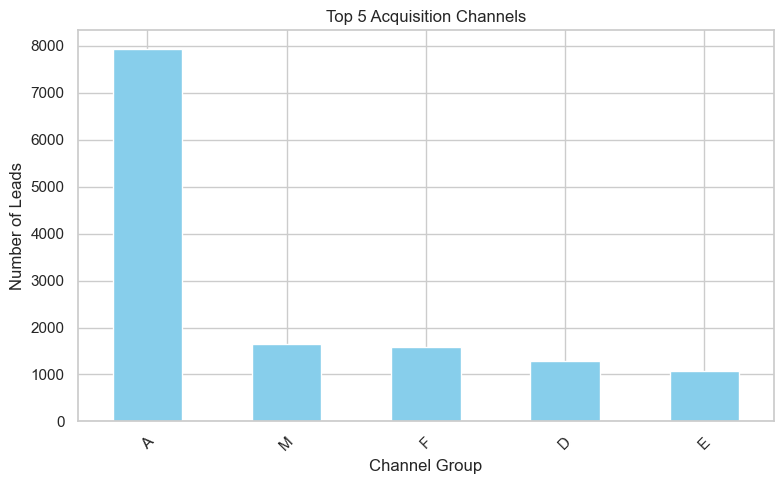

In [27]:
plt.figure(figsize=(8, 5))
channel_group_data.plot(kind='bar', color='skyblue')
plt.title("Top 5 Acquisition Channels")
plt.ylabel("Number of Leads")
plt.xlabel("Channel Group")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/mnt/data/top_acquisition_channels.png")
plt.show()

# Visualization 2: Most Popular Courses

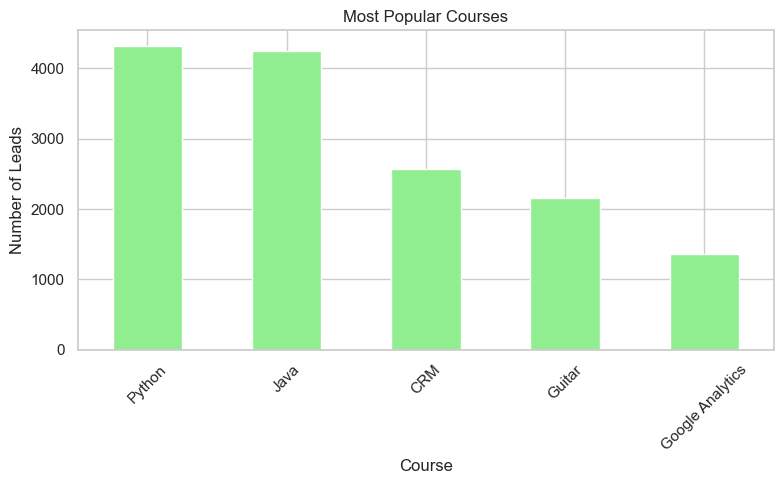

In [28]:
plt.figure(figsize=(8, 5))
course_data.plot(kind='bar', color='lightgreen')
plt.title("Most Popular Courses")
plt.ylabel("Number of Leads")
plt.xlabel("Course")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/mnt/data/popular_courses.png")
plt.show()

# Visualization 3: Conversion Rates by Channel

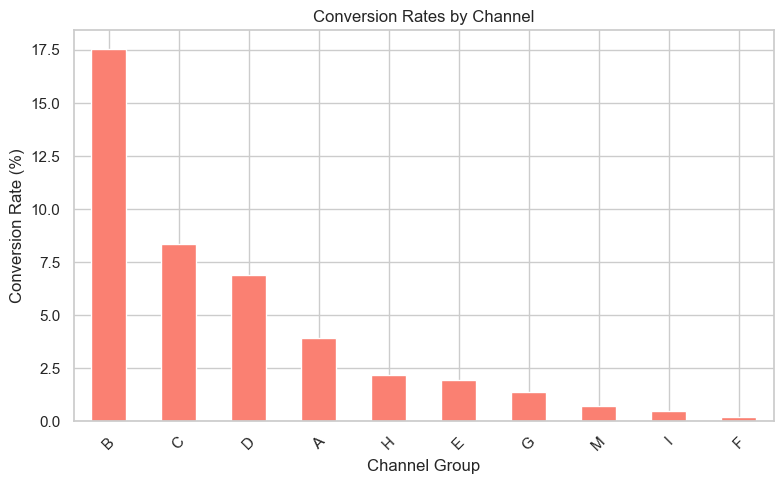

In [42]:
plt.figure(figsize=(8, 5))
conversion_rate.plot(kind='bar', color='salmon')
plt.title("Conversion Rates by Channel")
plt.ylabel("Conversion Rate (%)")
plt.xlabel("Channel Group")
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("/mnt/data/conversion_rates_by_channel.png")
plt.show()

# Visualization 4: Leads Over Time

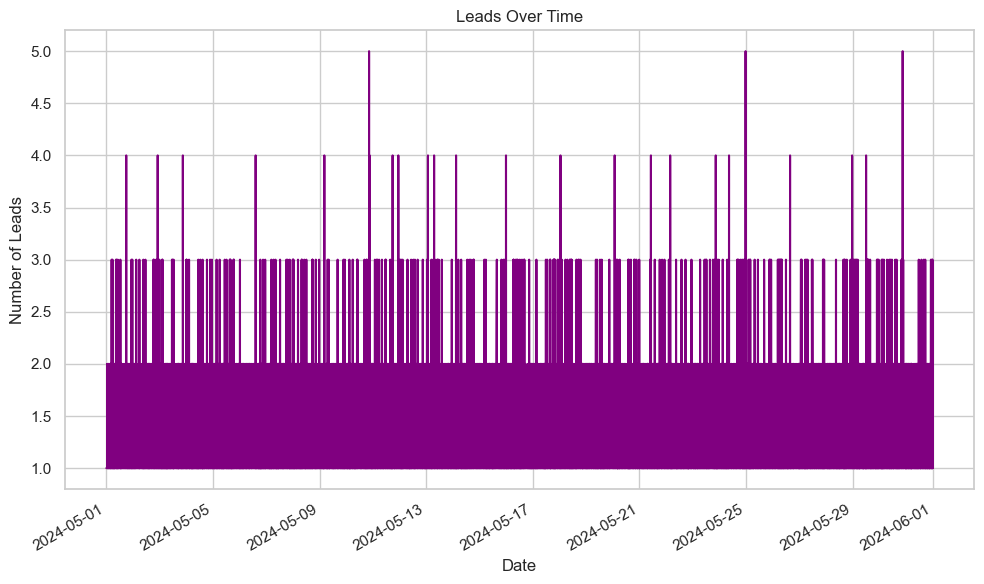

In [31]:
plt.figure(figsize=(10, 6))
leads_over_time.plot(kind='line', color='purple')
plt.title("Leads Over Time")
plt.ylabel("Number of Leads")
plt.xlabel("Date")
plt.tight_layout()
#plt.savefig("/mnt/data/leads_over_time.png")
plt.show()

In [39]:
# Exporting insights as text
insights_summary = {
    "Missing Data": missing_values.to_dict(),
    "Top Acquisition Channels": channel_group_data.to_dict(),
    "Top Courses": course_data.to_dict(),
    "Conversion Rates": conversion_rate.to_dict(),
    "Payment Summary": payment_summary,
    "Leads Over Time": leads_over_time.to_dict()
}
with open(file_path, "w") as f:
    for key, value in insights_summary.items():
        f.write(f"{key}:\n{value}\n\n")


print("Analysis complete. Visualizations and summary exported.")

Analysis complete. Visualizations and summary exported.


In [34]:
insights_summary

{'Missing Data': {'Channel_group': 0,
  'course': 0,
  'lead_id': 0,
  'Lead_type': 0,
  'lead_date': 0,
  'graduation_year': 0,
  'amount_paid': 15812,
  'paid_at': 15812},
 'Top Acquisition Channels': {'A': 7932,
  'M': 1647,
  'F': 1586,
  'D': 1294,
  'E': 1080},
 'Top Courses': {'Python': 4323,
  'Java': 4250,
  'CRM': 2565,
  'Guitar': 2164,
  'Google Analytics': 1358},
 'Conversion Rates': {'B': 17.543859649122805,
  'C': 8.345752608047691,
  'D': 6.87789799072643,
  'A': 3.9460413514876445,
  'H': 2.1656050955414012,
  'E': 1.9444444444444444,
  'G': 1.366742596810934,
  'M': 0.7285974499089253,
  'I': 0.47393364928909953,
  'F': 0.18915510718789408},
 'Payment Summary': {'Average Payment': 41670.317901234564,
  'Minimum Payment': 31611.0,
  'Maximum Payment': 48402.0},
 'Leads Over Time': {Timestamp('2024-05-01 00:03:00'): 1,
  Timestamp('2024-05-01 00:08:00'): 1,
  Timestamp('2024-05-01 00:09:00'): 1,
  Timestamp('2024-05-01 00:10:00'): 1,
  Timestamp('2024-05-01 00:13:00'): 